In [1]:
import pickle as pkl
with open('word_probe_f1_and_auc.pkl', 'rb') as f:
    metrics_dict = pkl.load(f)

In [2]:
import numpy as np
aucs = np.stack([metrics_dict[_]["auc"] for _ in range(10)])
f1s = np.stack([metrics_dict[_]["f1"] for _ in range(10)])

In [3]:
import pandas as pd
import seaborn as sns

def convert_metrics(metrics):
    scattered = []
    for i in range(metrics.shape[1]):
        for j in range(metrics.shape[2]):
            for k in range(metrics.shape[0]):
                scattered.append(np.array([i, j, k, metrics[k,i,j]]))
    df = pd.DataFrame(np.stack(scattered), columns=["layer", "kw", "split", "metric"])
    return df

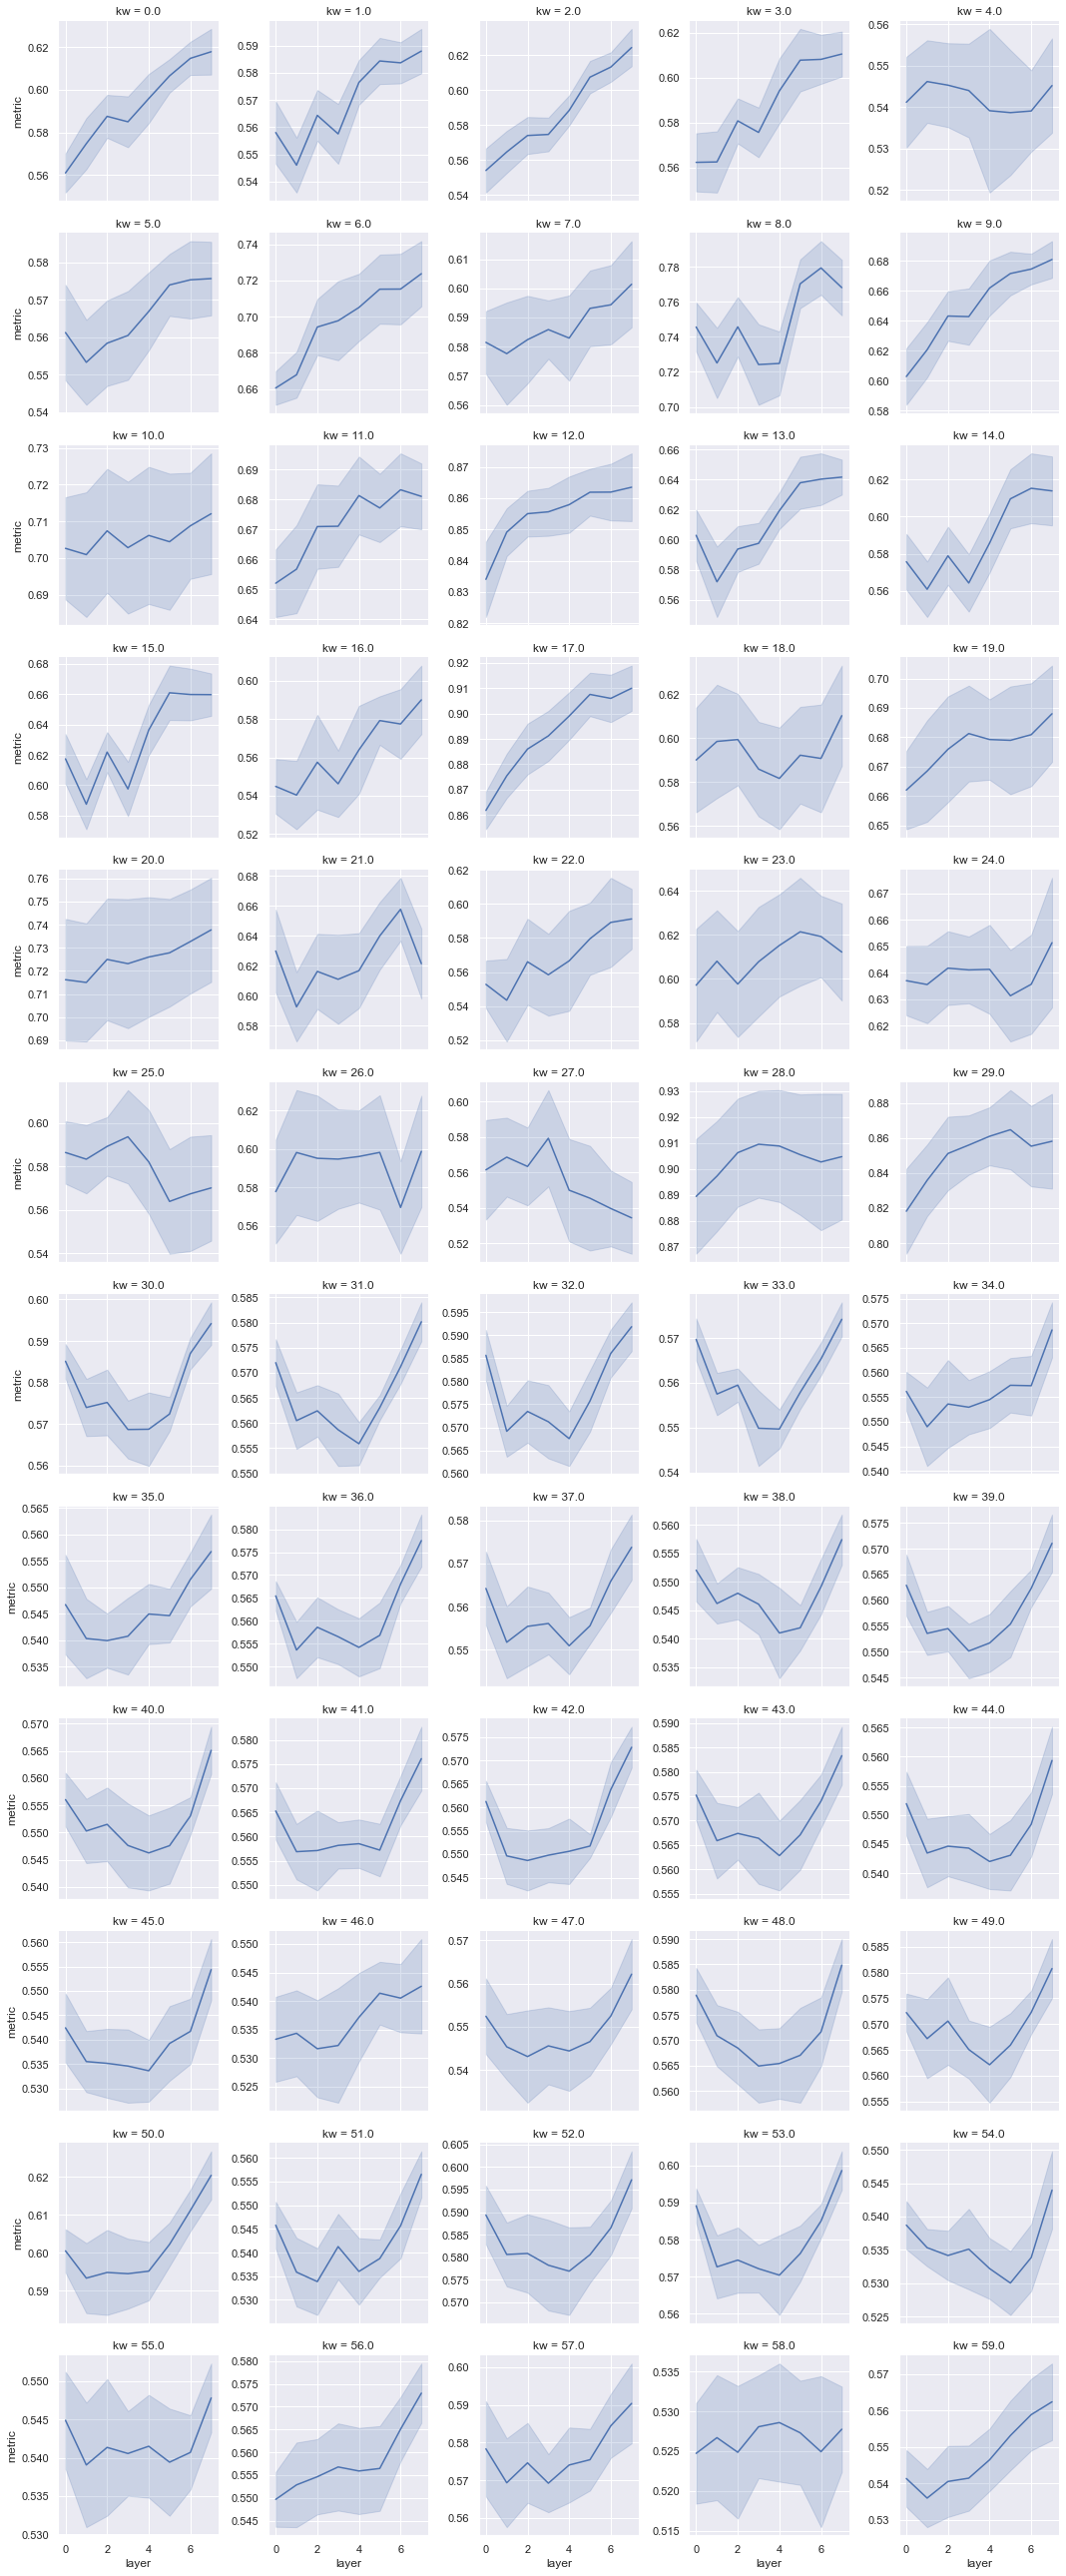

In [4]:
sns.set_theme(style="darkgrid")
df = convert_metrics(aucs)
g = sns.FacetGrid(data=df, col="kw", col_wrap=5, sharey=False)
g.map(sns.lineplot, "layer", "metric", ci='sd')

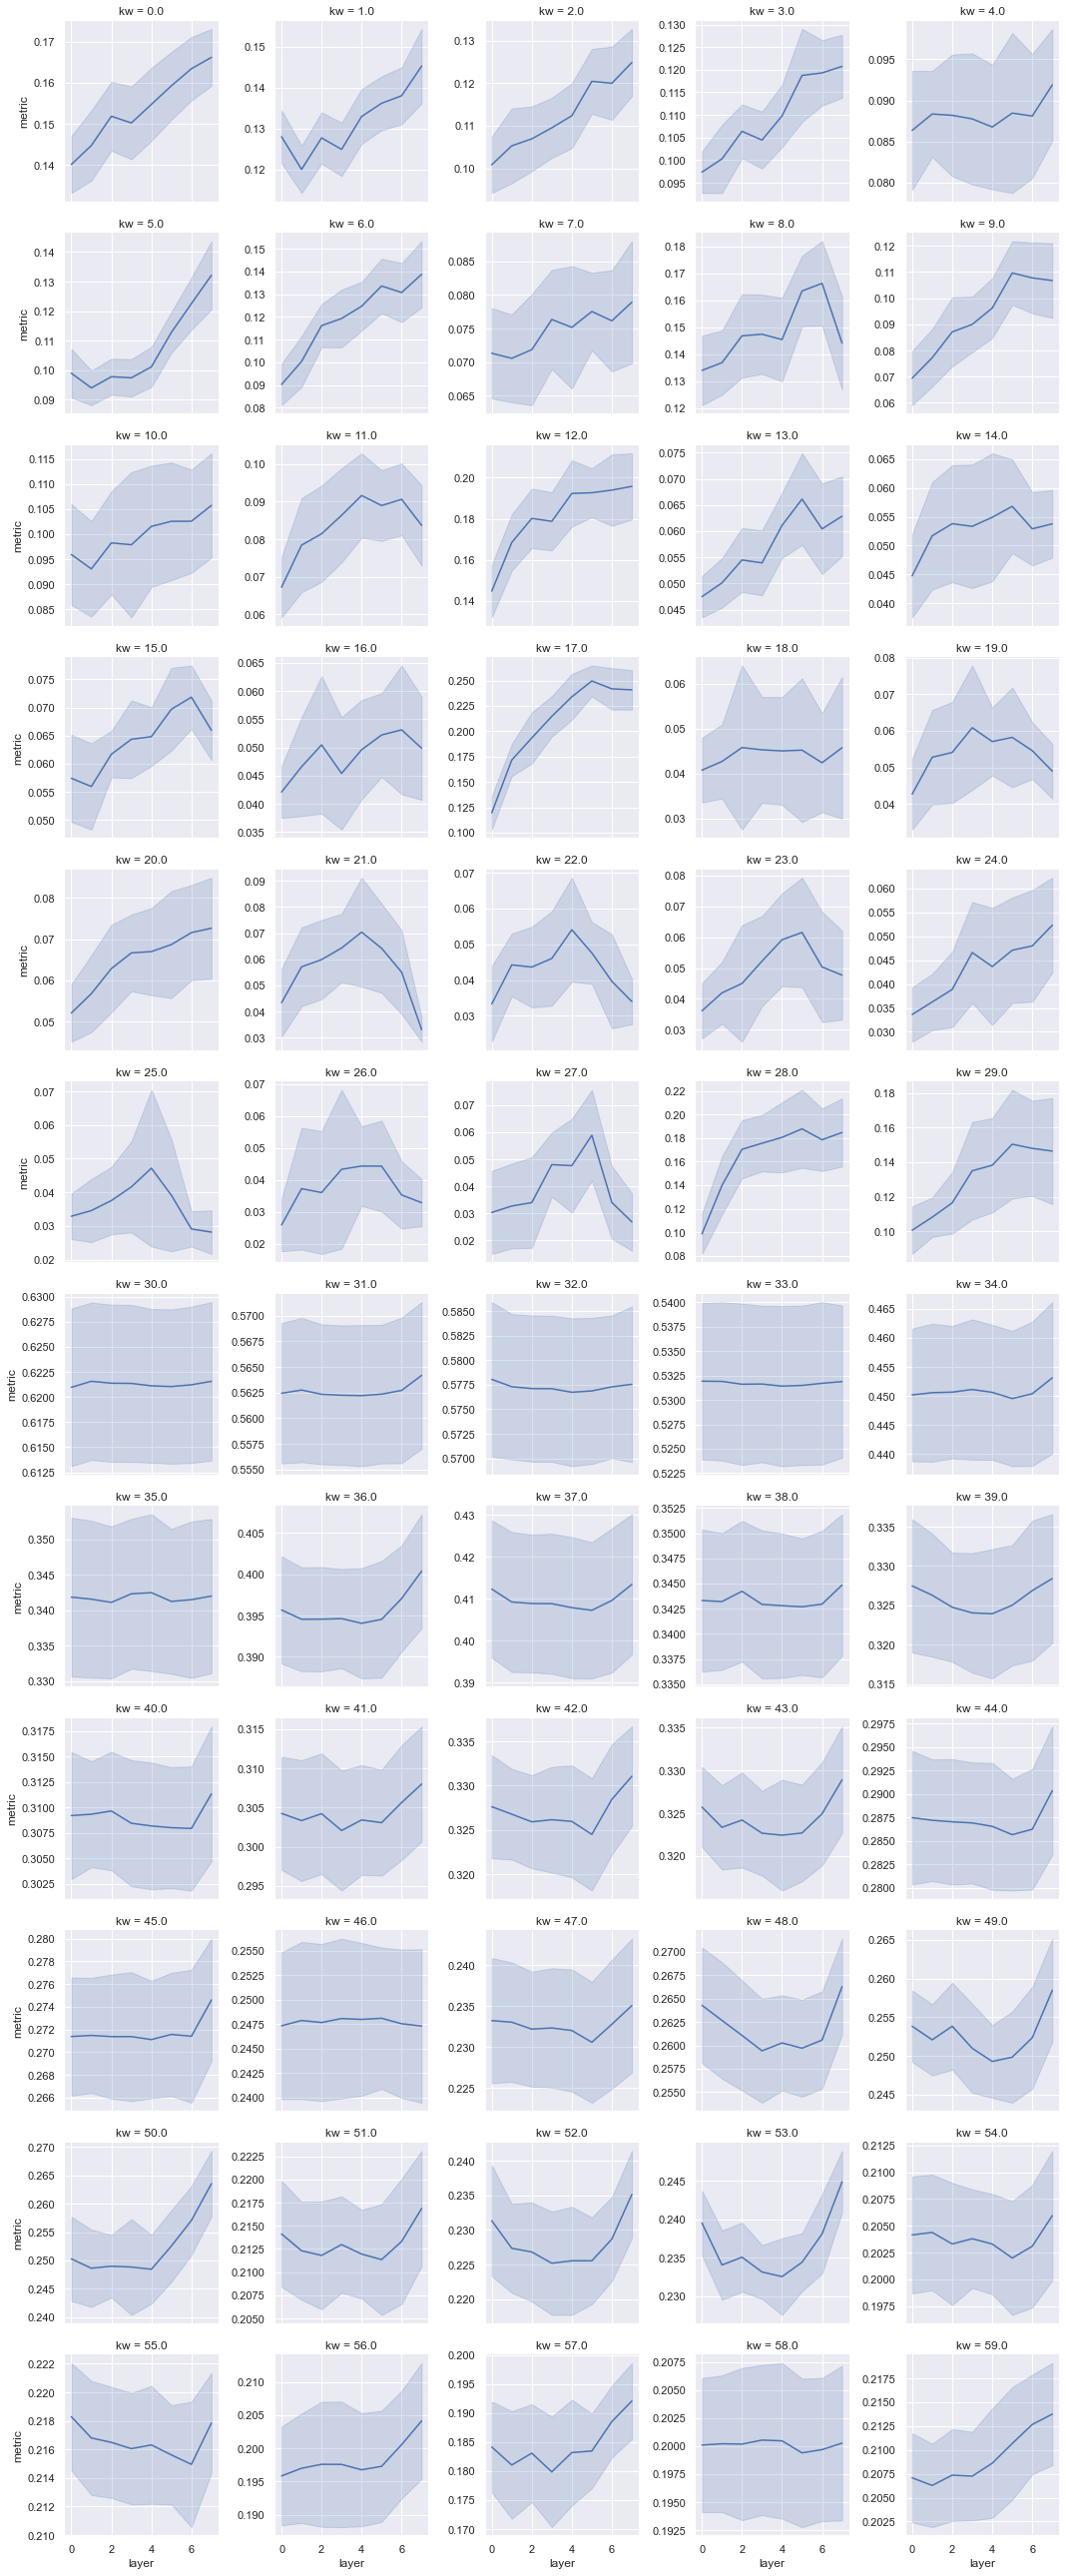

In [5]:
df = convert_metrics(f1s)
g = sns.FacetGrid(data=df, col="kw", col_wrap=5, sharey=False)
g.map(sns.lineplot, "layer", "metric", ci='sd')